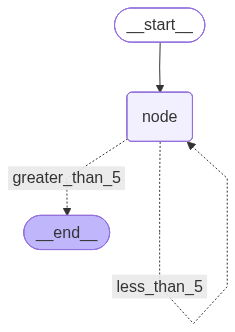

inside node incredmented num to 3
inside node incredmented num to 4
inside node incredmented num to 5
inside node incredmented num to 6
result : {'num': 6}


In [1]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict

class AgentState(TypedDict):
  num:int

def node(state:AgentState)->AgentState:
  state["num"]+=1
  print(f"inside node incredmented num to {state["num"]}")
  return state

def decider(state:AgentState)->str:
  num = state["num"]
  if num <= 5:
    return "less_than_5"
  else :
    return "greater_than_5"

# graph = StateGraph(initial_state)
graph = StateGraph(AgentState)
graph.add_node("node",node)
graph.add_conditional_edges(
  "node",
  decider,
  {
    "greater_than_5":END,
    "less_than_5":"node"
  }
)

graph.add_edge(START,"node")
# graph.add_edge("node",END)

app = graph.compile()

from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))


initial_state= AgentState(num=2)

result = app.invoke(initial_state)

print(f"result : {result}")



